# Time Series Assignment 2

In [2]:
import kagglehub
path = kagglehub.dataset_download("jeanmidev/smart-meters-in-london")

100%|██████████| 1.17G/1.17G [00:14<00:00, 86.0MB/s]

Extracting files...


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Reading The Data

In [34]:
block = pd.read_csv(os.path.join(path, 'hhblock_dataset/hhblock_dataset/block_10.csv'),  parse_dates=['day'])
block

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000322,2012-03-07,0.125,0.104,0.133,0.145,0.109,0.298,0.149,0.119,...,0.087,0.092,0.187,0.130,0.096,0.096,0.137,0.101,0.137,0.485
1,MAC000322,2012-03-08,0.279,0.247,0.253,0.275,0.114,0.105,0.117,0.141,...,0.105,0.132,0.252,0.105,0.096,0.129,0.120,0.070,0.039,0.074
2,MAC000322,2012-03-09,0.036,0.130,0.364,0.120,0.100,0.118,0.146,0.105,...,0.028,0.030,0.072,0.038,0.029,0.046,0.069,0.029,0.050,0.520
3,MAC000322,2012-03-10,0.435,0.093,0.105,0.138,0.099,0.096,0.133,0.129,...,0.120,0.125,0.115,0.101,0.142,0.112,0.099,0.150,0.152,0.097
4,MAC000322,2012-03-11,0.187,0.122,0.094,0.109,0.139,0.099,0.111,0.137,...,0.036,0.100,0.358,0.122,0.095,0.111,0.141,0.097,0.095,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,MAC005354,2014-02-23,0.103,0.069,0.101,0.144,0.080,0.061,0.105,0.130,...,0.078,0.098,0.124,0.130,0.116,0.110,0.112,0.130,0.086,0.126
31474,MAC005354,2014-02-24,0.100,0.109,0.088,0.121,0.086,0.084,0.101,0.103,...,0.064,0.114,0.135,0.141,0.081,0.130,0.128,0.090,0.109,0.152
31475,MAC005354,2014-02-25,0.110,0.069,0.103,0.140,0.082,0.061,0.112,0.129,...,0.084,0.076,0.134,0.150,0.104,0.080,0.124,0.122,0.122,0.095
31476,MAC005354,2014-02-26,0.130,0.102,0.086,0.102,0.105,0.096,0.062,0.115,...,0.067,0.102,0.134,0.122,0.098,0.086,0.145,0.106,0.090,0.121


In [31]:
def convert_standard_form_to_expand_time_series(standard_df, verbose=False):
   # Similar to compact steps
  expand_df = pd.melt(standard_df, id_vars=['day','LCLid'],value_name='energy_consumption',var_name='offset')
  expand_df['offset'] = expand_df['offset'].str.replace('hh_','').astype(int)
  expand_df = expand_df.sort_values(by=['day','offset']).reset_index(drop=True)
#   expand_df['frequency'] = '30min'
#   expand_df['serie_length'] = len(expand_df)
  ## Here we resample our day column to construct a timestamp column with frequenct 30min
  expand_df['timestamp'] = pd.date_range(start=standard_df['day'].min(), freq='30min', periods=len(expand_df))
  ## Drop unnecessary columns
  expand_df = expand_df.drop(columns=['day','offset'])
#   expand_df = expand_df[['LCLid','timestamp','energy_consumption','frequency','serie_length']]
  expand_df = expand_df[['LCLid','timestamp','energy_consumption']]
  if verbose:
    display(expand_df)
  return expand_df


In [60]:
block_id =block[block['LCLid'] == 'MAC000322']
expanded_df = convert_standard_form_to_expand_time_series(block_id)
expanded_df

,LCLid,timestamp,energy_consumption
0,MAC000322,2012-03-07 00:00:00,0.125
1,MAC000322,2012-03-07 00:30:00,0.104
2,MAC000322,2012-03-07 01:00:00,0.133
3,MAC000322,2012-03-07 01:30:00,0.145
4,MAC000322,2012-03-07 02:00:00,0.109
...,...,...,...
34507,MAC000322,2014-02-23 21:30:00,0.116
34508,MAC000322,2014-02-23 22:00:00,0.108
34509,MAC000322,2014-02-23 22:30:00,0.129
34510,MAC000322,2014-02-23 23:00:00,0.058


## Preparing the data

In [66]:
df = expanded_df.drop('LCLid', axis=1).set_index('timestamp')
df

,energy_consumption
timestamp,
2012-03-07 00:00:00,0.125
2012-03-07 00:30:00,0.104
2012-03-07 01:00:00,0.133
2012-03-07 01:30:00,0.145
2012-03-07 02:00:00,0.109
...,...
2014-02-23 21:30:00,0.116
2014-02-23 22:00:00,0.108
2014-02-23 22:30:00,0.129


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34512 entries, 2012-03-07 00:00:00 to 2014-02-23 23:30:00
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_consumption  34511 non-null  float64
dtypes: float64(1)
memory usage: 539.2 KB


In [67]:
df.describe()

,energy_consumption
count,34511.000000
mean,0.106438
std,0.105291
min,0.009000
25%,0.053000
50%,0.083000
75%,0.124000
max,1.159000


#### Checking null values

In [63]:
df[df['energy_consumption'].isna()]

,energy_consumption
timestamp,
2012-12-14 15:00:00,NaN


In [88]:
df['energy_consumption'] = df['energy_consumption'].interpolate(method='spline', order=3)

In [89]:
df['energy_consumption'].isna().sum()

np.int64(0)

#### Setting hourly, daily, weekly, and monthly data

In [90]:
hourly_df = df.resample('1h').sum()
daily_df = df.resample('1D').sum()
weekly_df = df.resample('1W').sum()
monthly_df = df.resample('1MS').sum()

## Show stationarity for precision hourly, daily, weekly and monthly

In [91]:
def run_seq_plot(consumption, title, x_label='Time', y_label='Consumption'):
    time = np.arange(len(consumption))
    plt.figure(figsize=(18,6))
    plt.plot(time, consumption)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(alpha=0.3)

#### Hourly

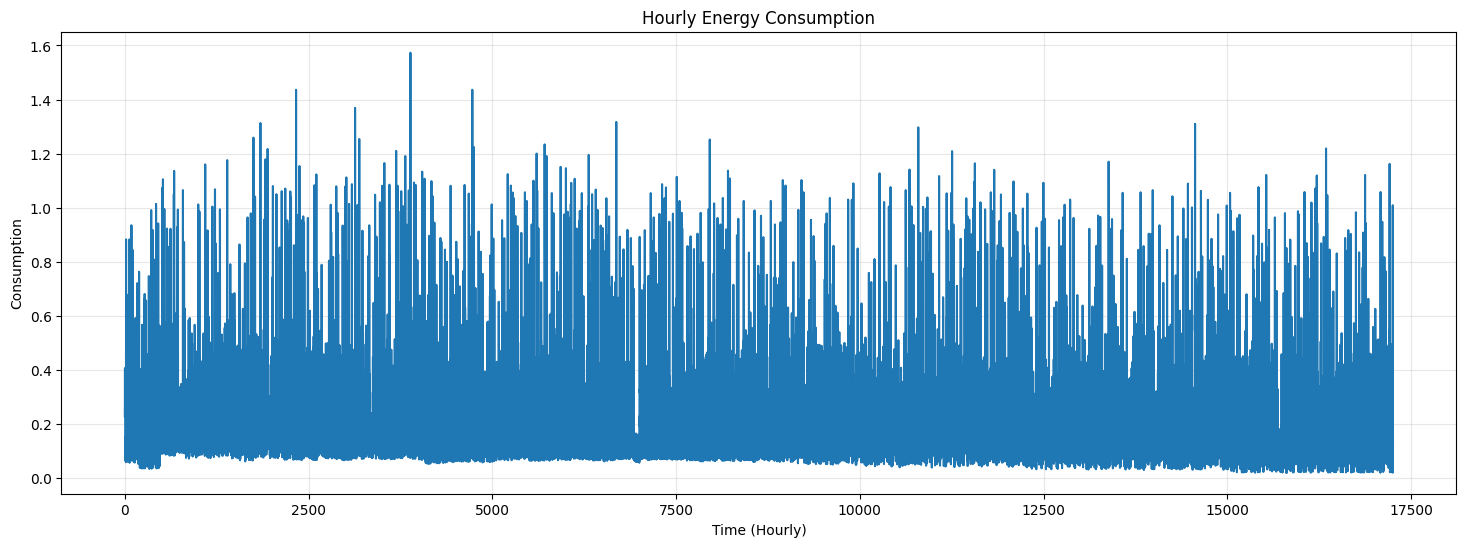

In [92]:
run_seq_plot(hourly_df['energy_consumption'], 'Hourly Energy Consumption', x_label='Time (Hourly)')

It's not very clear whether the data is stationary or not since it's very dense. We can try zooming in into a section of the data and see if we can come up with something.



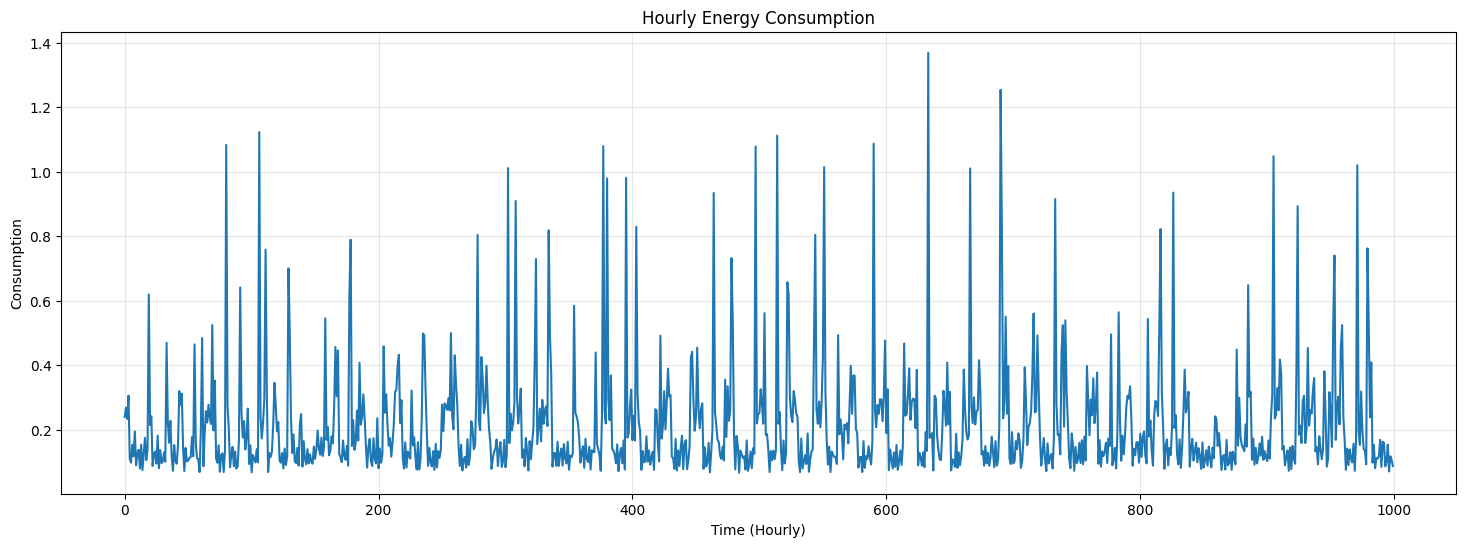

In [93]:
run_seq_plot(hourly_df['energy_consumption'][2500:3500], 'Hourly Energy Consumption', x_label='Time (Hourly)')

I can say that I can not see any apparent trend in this section of the data 'which could be misleading if the trend is more visible on a longer period of time but that wasn't the case with the previouse plot'. So we can say that the data generally lacks any strong trend.

As for the seasonality I can see some reapting patterns in this section which indicates to an existing seasonal component.

I don't think there is a strong change in mean or variance throught the window we are looking at though.

To have a better conclusion of whether the data is stationary or not we can try one or two of the following

1.   Looking at data in less details (maybe daily, weekly ,or monthly)
2.   Try ADF and KPSS tests



##### ADF

In [101]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(hourly_df['energy_consumption'])
print(adf, pvalue, critical_values, sep='\n')

-22.657022034534517
0.0
{'1%': np.float64(-3.430729917243561), '5%': np.float64(-2.8617079085729547), '10%': np.float64(-2.566859373405266)}


##### KPSS

In [102]:
from statsmodels.tsa.stattools import kpss

kpss_, pvalue_, usedlag_, critical_values_, = kpss(hourly_df['energy_consumption'], nlags='auto')
print(kpss_, pvalue_, critical_values_, sep='\n')

2.3035944903205747
0.01
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-102-51196ceb6e72>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_, pvalue_, usedlag_, critical_values_, = kpss(hourly_df['energy_consumption'], nlags='auto')


hmm, According to the ADF we should reject the null which means according to the test the data is stationary.

But according to the KPSS test we should reject the null which means according to the test the data is non stationary.

Lets look to data in more general way.

#### Daily

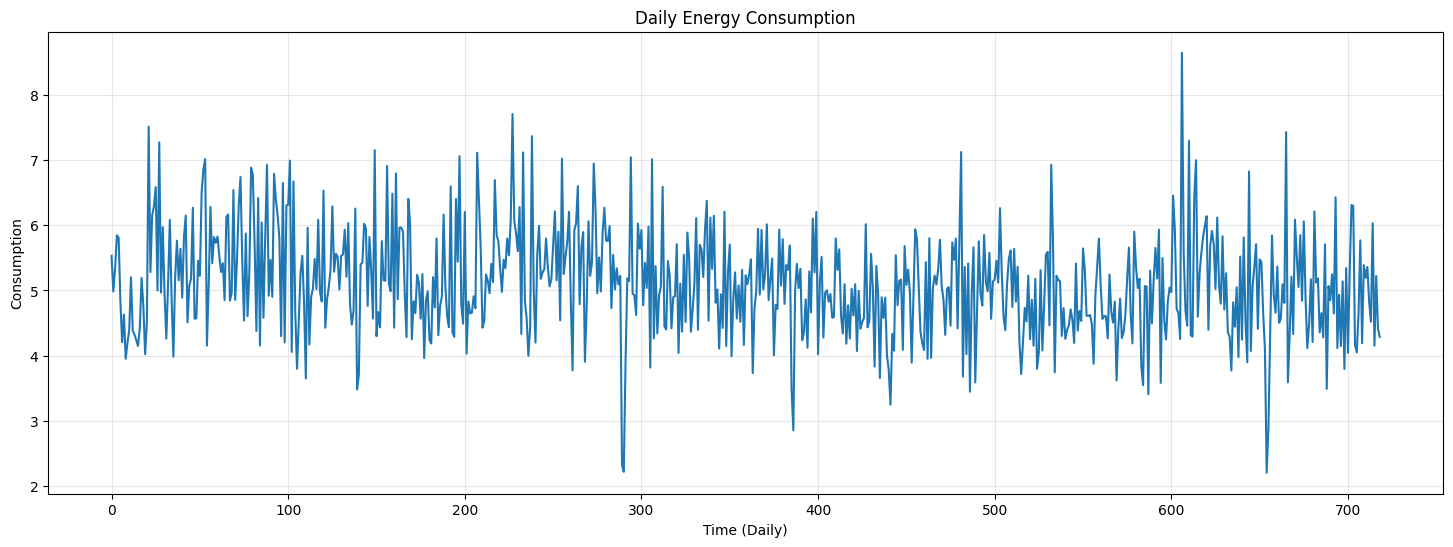

In [123]:
run_seq_plot(daily_df['energy_consumption'], 'Daily Energy Consumption', x_label='Time (Daily)')

We can see in a clearer way that the data has no apparent trend which suites what we got from the tests in the previous analysis. While the variance may be changing over time.

In [118]:
chunks = np.array_split(daily_df['energy_consumption'].values, indices_or_sections=10)
for chunk in chunks:
    print(np.var(chunk))

0.6740157561728396
0.7783331788194444
0.664968098765432
0.5909944868795763
0.7316104565972222
0.4034124905478395
0.5468930553626543
0.33974909182098767
0.8487936288580246
0.7125168494346359


In [119]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(daily_df['energy_consumption'])
print(adf, pvalue, critical_values, sep='\n')

-10.247416608234571
4.578851229106772e-18
{'1%': np.float64(-3.4395289262948894), '5%': np.float64(-2.8655907692307694), '10%': np.float64(-2.5689271030368235)}


In [120]:
kpss_, pvalue_, usedlag_, critical_values_, = kpss(daily_df['energy_consumption'], nlags='auto')
print(kpss_, pvalue_, critical_values_, sep='\n')

1.73984903995425
0.01
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-120-73396877c937>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_, pvalue_, usedlag_, critical_values_, = kpss(daily_df['energy_consumption'], nlags='auto')


Both tests show the same results which is to be expected since it's the same data just different scale.

#### Weekly

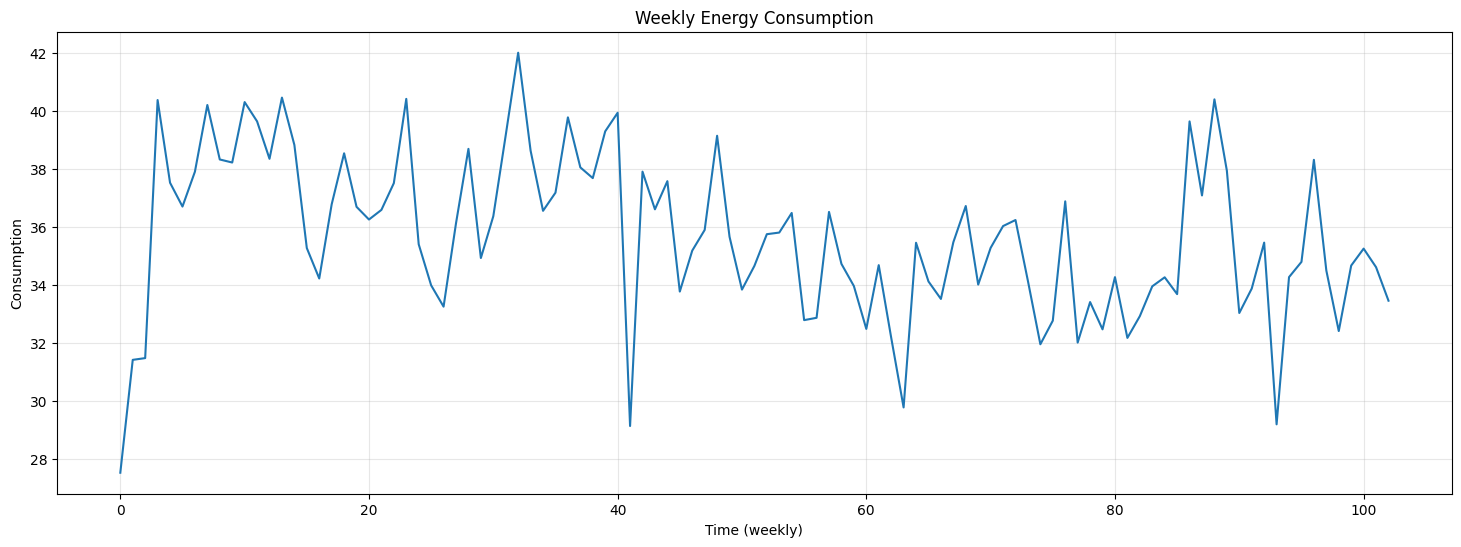

In [124]:
run_seq_plot(weekly_df['energy_consumption'], 'Weekly Energy Consumption', x_label='Time (weekly)')

Overall, Looking at the data at this level of detail, I can see a weak trend of decreasing energy consumption overtime. But, I can't see any strong seasonality component. But I think that there is an auto correlation effect. Also, there is an apparent change in variance throught the time.

In [125]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(weekly_df['energy_consumption'])
print(adf, pvalue, critical_values, sep='\n')

-2.6992488065577165
0.07416834854238563
{'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}


In [126]:
kpss_, pvalue_, usedlag_, critical_values_, = kpss(weekly_df['energy_consumption'], nlags='auto')
print(kpss_, pvalue_, critical_values_, sep='\n')

0.7524360141723917
0.01
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-126-feebd7174f47>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_, pvalue_, usedlag_, critical_values_, = kpss(weekly_df['energy_consumption'], nlags='auto')


Interesting, according to both tests the data is non stationary. Which supports what we saw in the run sequence plot!

#### Monthly

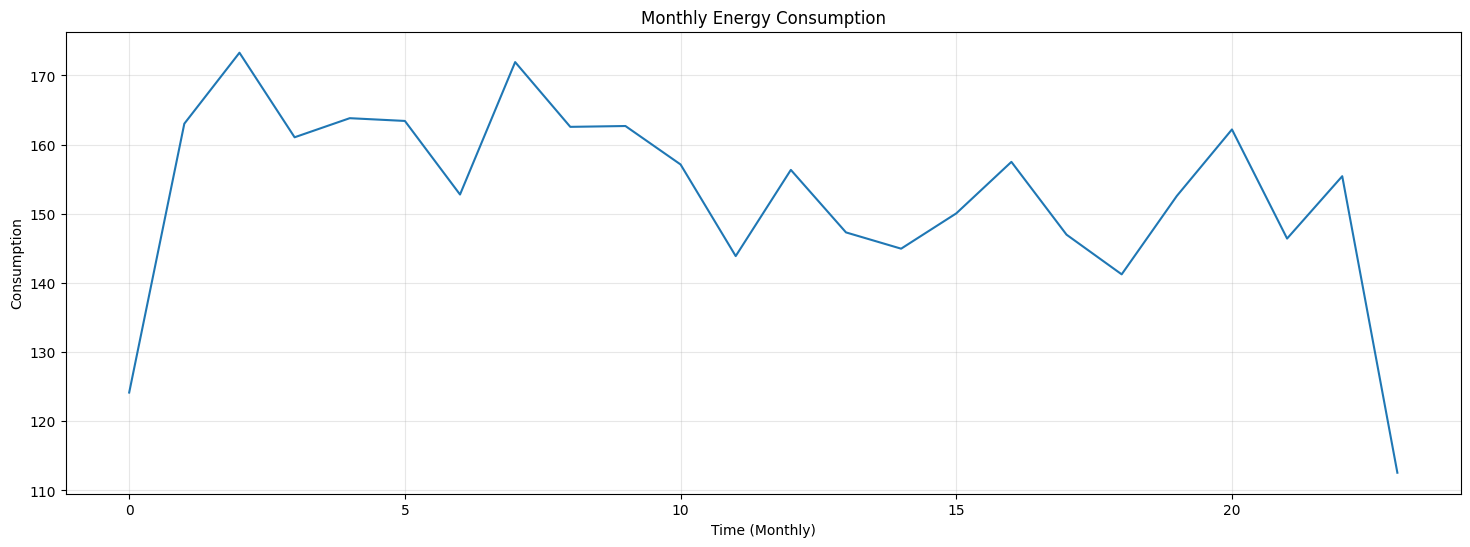

In [128]:
run_seq_plot(monthly_df['energy_consumption'], 'Monthly Energy Consumption', x_label='Time (Monthly)')

This point of view shows that there could be a weak trend, but I can't see any strong change in variance or seasonality.

In [129]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(monthly_df['energy_consumption'])
print(adf, pvalue, critical_values, sep='\n')

-3.462365548362785
0.00900789585346822
{'1%': np.float64(-3.7529275211638033), '5%': np.float64(-2.998499866852963), '10%': np.float64(-2.6389669754253307)}


In [130]:
kpss_, pvalue_, usedlag_, critical_values_, = kpss(monthly_df['energy_consumption'], nlags='auto')
print(kpss_, pvalue_, critical_values_, sep='\n')

0.43044513412986424
0.06403226977161025
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


The tests supporst our claims and both tests agrees that the data is indeed stationary.

## Showing Forecasting using ETS family models

In [133]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse

### 1. Single Exponential Smoothing (SES)


Single Exponential Smoothing is good when working on stationary simple data. So we can try using it with the daily data.

In [180]:
train_daily = daily_df[:-20]
test_daily = daily_df[-20:]

single = SimpleExpSmoothing(train_daily).fit(optimized=True)
single_preds = single.forecast(len(test_daily))
single_mse = mse(test_daily, single_preds)
print(single_mse)


0.5458714095061445


In [181]:
time = np.arange(len(daily_df))

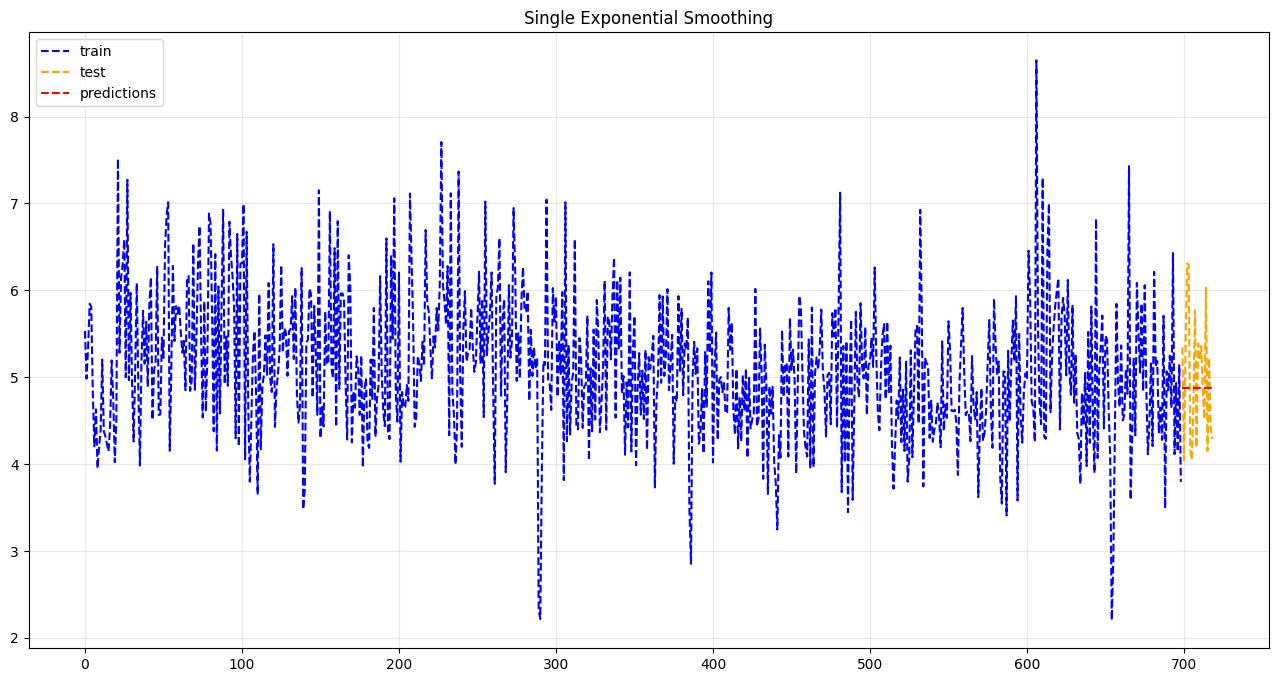

In [145]:
plt.figure(figsize=(16,8))
plt.plot(time[:-20], train_daily, 'b--', label="train")
plt.plot(time[-20:], test_daily, color='orange', linestyle="--", label="test")
plt.plot(time[-20:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

As expected, the forcast is just a horizontal line as it can't capture the trend nor the seasonality.

### 2. Double Exponential Smoothing (DES) - Holt's Linear Trend Method


In [184]:
train_weekly = weekly_df[:-20]
test_weekly = weekly_df[-20:]

double = Holt(train_weekly).fit(optimized=True)
double_preds = double.forecast(len(test_weekly))
double_mse = mse(test_weekly, double_preds)
print(double_mse)


20.799677313146113


In [185]:
time = np.arange(len(weekly_df))

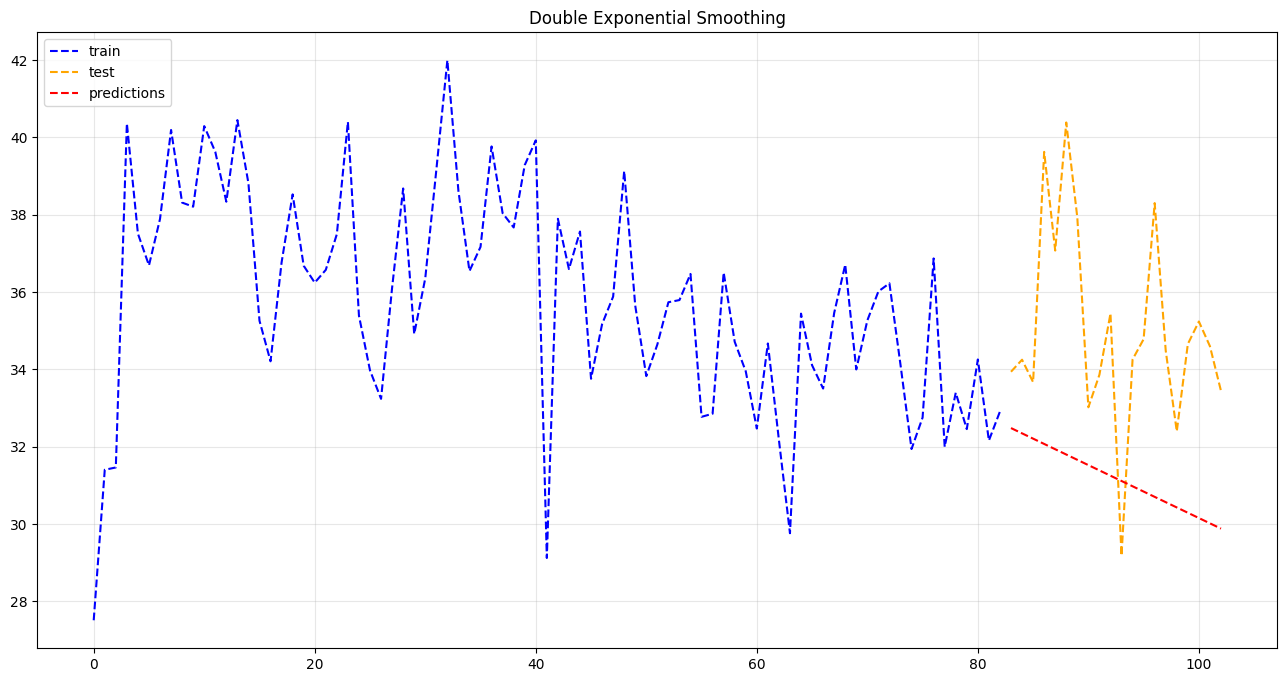

In [175]:
plt.figure(figsize=(16,8))
plt.plot(time[:-20], train_weekly, 'b--', label="train")
plt.plot(time[-20:], test_weekly, color='orange', linestyle="--", label="test")
plt.plot(time[-20:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

The model just picked the trend and used it to forcast all upcoming events which was very bad forecasting.

### 3. Triple Exponential Smoothing (TES) - Holt-Winters' Seasonal Method


In [186]:
triple = ExponentialSmoothing(train_weekly.values,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=4).fit(optimized=True)
triple_preds = triple.forecast(len(test_weekly))
triple_mse = mse(test_weekly, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [33.48522254 33.90780636 32.59248511 32.97520193 33.56888439 33.99146821
 32.67614696 33.05886377 33.65254623 34.07513005 32.7598088  33.14252562
 33.73620808 34.1587919  32.84347065 33.22618746 33.81986992 34.24245374
 32.92713249 33.30984931]
MSE:  8.434966355585688


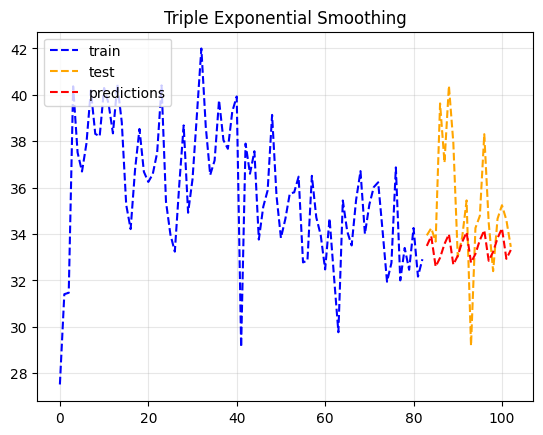

In [187]:
plt.plot(time[:-20], train_weekly, 'b--', label="train")
plt.plot(time[-20:], test_weekly, color='orange', linestyle="--", label="test")
plt.plot(time[-20:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

The forcasting is picking the trend and is trying to pick the seasonality but it's still unable to forcast the upcoming events.

### References

1.   [Module 2](https://colab.research.google.com/drive/14vhBnBDxT5szYq9XVuZTeCJK_o8vlbDM#scrollTo=Af8i0IDTJGNg)


